In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
# to save and write as pngs
from imageio import imwrite, imread
import math
from scipy import ndimage as ndi

In [2]:
image = imread("testImagio_dicom.png");
print(np.unique(image))

print('the size: {}, dimension: {} and shape: {} of the image'.format(image.size, image.ndim, image.shape));

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 242 243 246 247 254 255]
t

number of values in image:  246


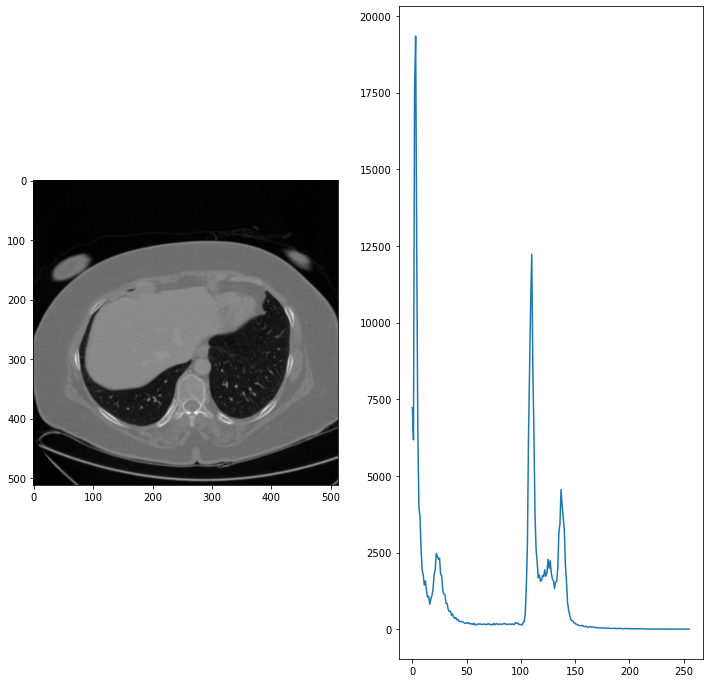

In [3]:
print('number of values in image: ',len(np.unique(image)));
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
uniqe = np.unique(image, return_counts=True)
plt.plot(uniqe[0],uniqe[1])
plt.show();


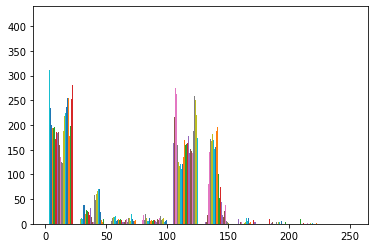

In [26]:
plt.hist(image)
plt.show()

number of values in image:  246


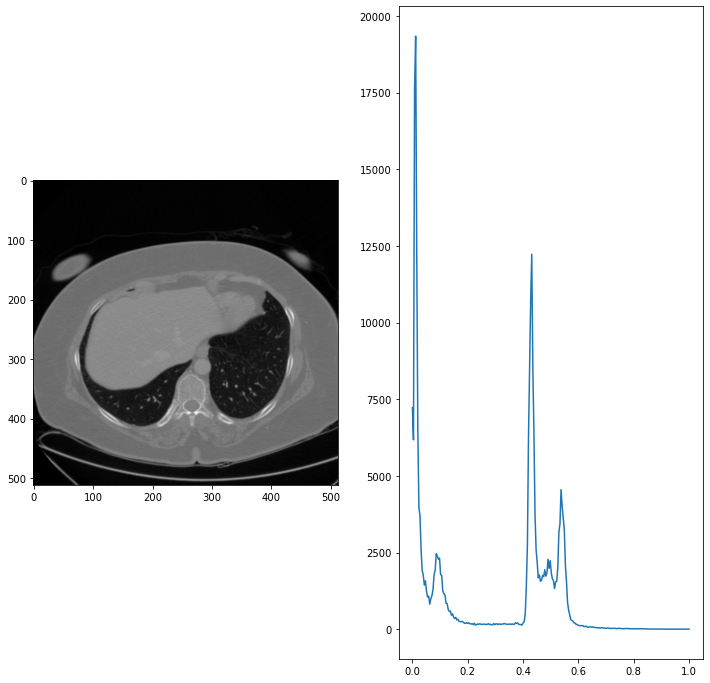

In [9]:
norm_img = image/np.max(image);
print('number of values in image: ',len(np.unique(norm_img)));
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(norm_img, cmap='gray')
plt.subplot(1, 2, 2)
uniq_norm_img = np.unique(norm_img, return_counts=True)
plt.plot(uniq_norm_img[0],uniq_norm_img[1])
plt.show();

In [10]:
def give_transferMatrix(scaling):
    sx=scaling[0]
    sy=scaling[1]
    scale_matrix = [[sx, 0],
                [0, sy]]
    return scale_matrix

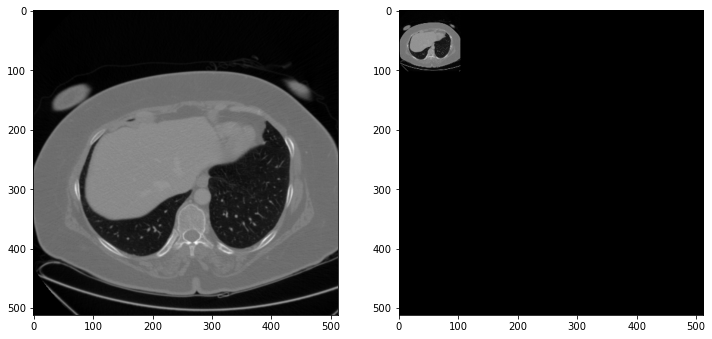

In [58]:
scaling_factor = 5;
transf_matrix = give_transferMatrix([scaling_factor, scaling_factor]);

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.interpolation.affine_transform.html
ssd_reg_img = ndi.interpolation.affine_transform(norm_img, transf_matrix, offset=(0, 0))

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.imshow(norm_img, cmap='gray')
plt.subplot(122)
plt.imshow(ssd_reg_img, cmap='gray')
plt.show()

number of values in image:  246


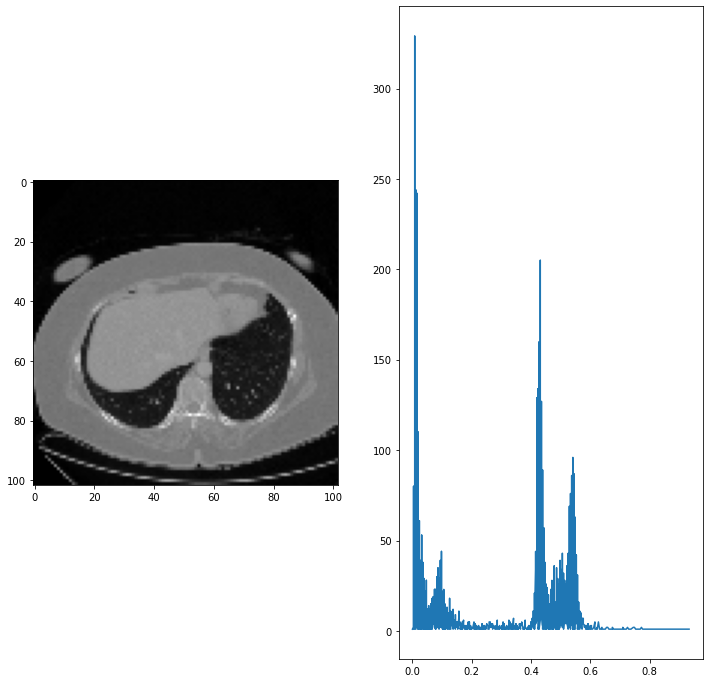

In [59]:
scaled_image = ssd_reg_img[0:int(round(image.shape[0]/scaling_factor)), 0:int(round(image.shape[1]/scaling_factor))];
print('number of values in image: ',len(np.unique(norm_img)));
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(scaled_image, cmap='gray')
plt.subplot(1, 2, 2)
uniq_scaled_image = np.unique(scaled_image, return_counts=True)
plt.plot(uniq_scaled_image[0], uniq_scaled_image[1])
plt.show();

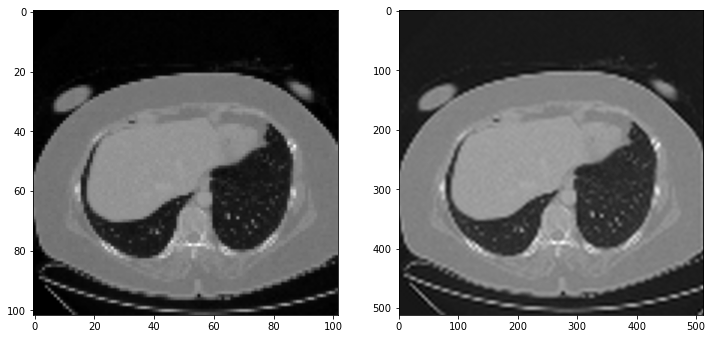

In [60]:
# test to go back to original size, loose resolution! maybe it's okey, we only need to obtain a segmentation mask to
# on original image!
invers_scaling_factor = 1/scaling_factor;
transf_matrix = give_transferMatrix([invers_scaling_factor , invers_scaling_factor]);

# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.ndimage.interpolation.affine_transform.html
ssd_reg_img_test = ndi.interpolation.affine_transform(ssd_reg_img, transf_matrix, offset=(0, 0))

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.imshow(scaled_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(ssd_reg_img_test, cmap='gray')
plt.show()

In [68]:
def build_weighMatrix(image):
#     image = image/np.max(image); # normalize the values of the image 0-1 
    G = np.zeros((image.shape[0]**2,image.shape[1]**2)) 
    fltn_img = image.flatten();
    for i in range(G.shape[0]):
        for j in range(G.shape[1]):
            diff = math.exp(math.sqrt(math.pow(fltn_img[i] - fltn_img[j], 2))) ;
            # calc the square root difference 
            # between each pixel value and the sum of the intensities of the normalized image

            G[i,j] = diff;
    return G;

number of values in image:  1358


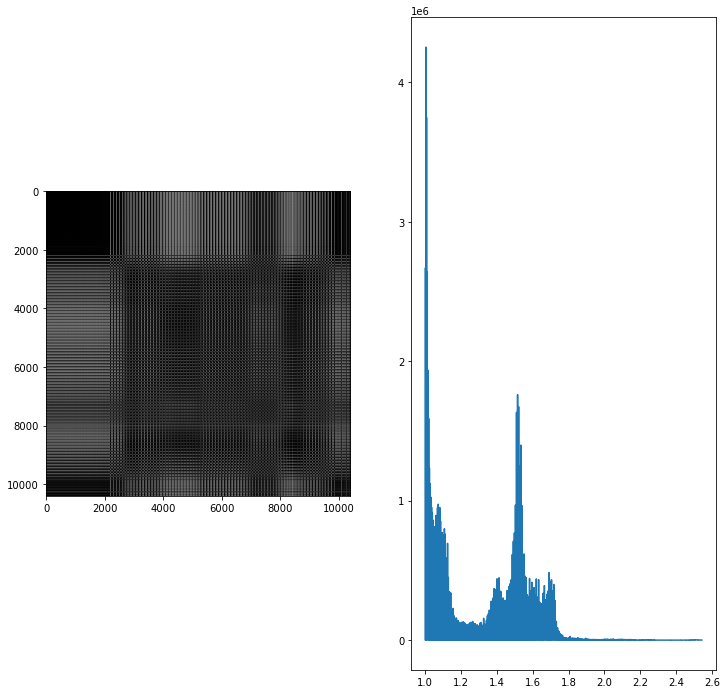

In [69]:
g = build_weighMatrix(scaled_image); # som kind of 
print('number of values in image: ',len(np.unique(g)));
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(g, cmap='gray')
plt.subplot(1, 2, 2)
uniqeg = np.unique(g, return_counts=True)
plt.plot(uniqeg[0],uniqeg[1])
plt.show();

In [78]:
print(np.unique(g))

[1.         1.         1.         ... 2.53301873 2.53301873 2.54297164]


In [82]:
# np.savetxt("Ahmad_simi_matrix.csv", g, fmt='%1.4f', delimiter=",")


In [77]:
# imwrite(str("Ahmad_simi_matrix.png"), g)
i = imread("Ahmad_simi_matrix.png");
i = i/np.max(i)
print(np.unique(i))
print('the size: {}, dimension: {} and shape: {} of the image'.format(i.size, i.ndim, i.shape));

[0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.0745098  0.07843137 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196078 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941176 0.13333333 0.1372549
 0.14117647 0.14509804 0.14901961 0.15294118 0.15686275 0.16078431
 0.16470588 0.16862745 0.17254902 0.17647059 0.18039216 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29411765 0.29803922 0.30196078
 0.30588235 0.30980392 0.31372549 0.31764706 0.32156863 0.3254902
 0.32941176 0.33333333 0.3372549  0.34117647 0.34509804 0.349019

number of values in image:  218


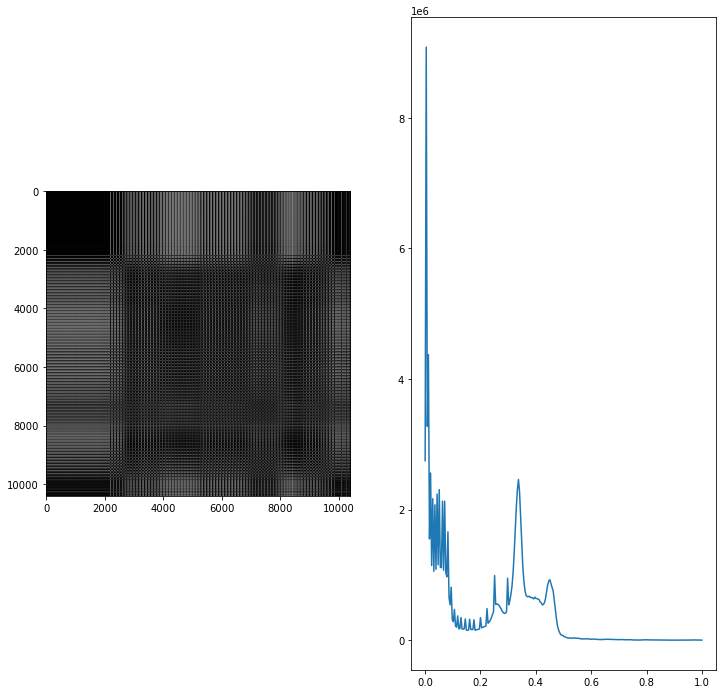

In [81]:
print('number of values in image: ',len(np.unique(i)));
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
plt.imshow(i, cmap='gray')
plt.subplot(1, 2, 2)
uniqei = np.unique(i, return_counts=True)
plt.plot(uniqei[0],uniqei[1])
plt.show();

In [ ]:
# All below is old stuff, probably gonna delet all but keep it just for now in case something might be useful

number of values in image:  246


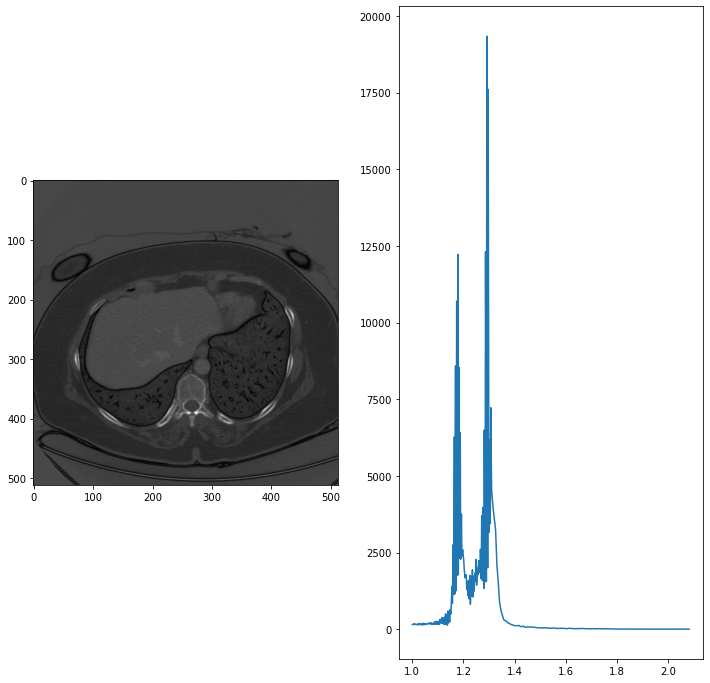

In [48]:
# g = build_weighMatrix(image); # som kind of 
# print('number of values in image: ',len(np.unique(g)));
# plt.figure(figsize=(12,12))
# plt.subplot(1, 2, 1)
# plt.imshow(g, cmap='gray')
# plt.subplot(1, 2, 2)
# uniqeg = np.unique(g, return_counts=True)
# plt.plot(uniqeg[0],uniqeg[1])
# plt.show();

number of values in image:  246


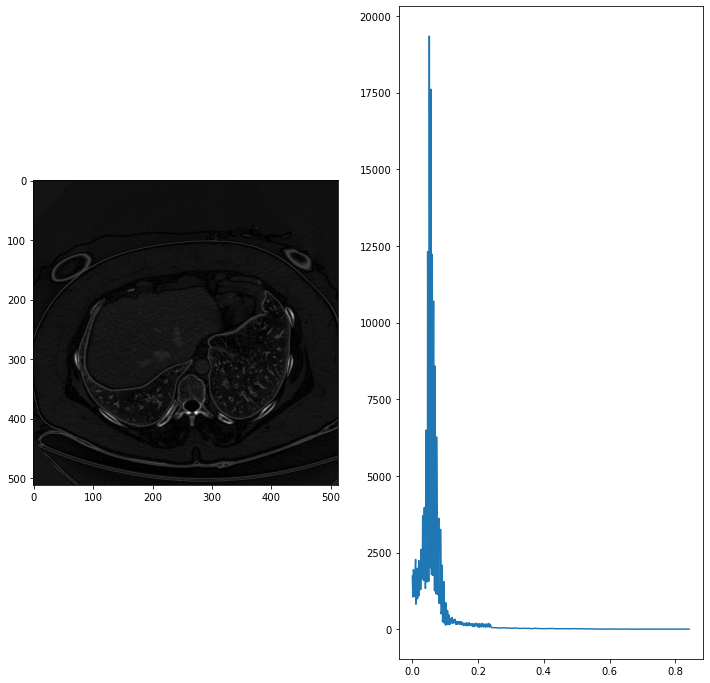

In [49]:
# gtest = np.abs(g - np.mean(g))
# print('number of values in image: ',len(np.unique(gtest)));
# plt.figure(figsize=(12,12))
# plt.subplot(1, 2, 1)
# plt.imshow(gtest, cmap='gray')
# plt.subplot(1, 2, 2)
# uniqegtest = np.unique(gtest, return_counts=True)
# plt.plot(uniqegtest[0],uniqegtest[1])
# plt.show();

number of values in image:  138


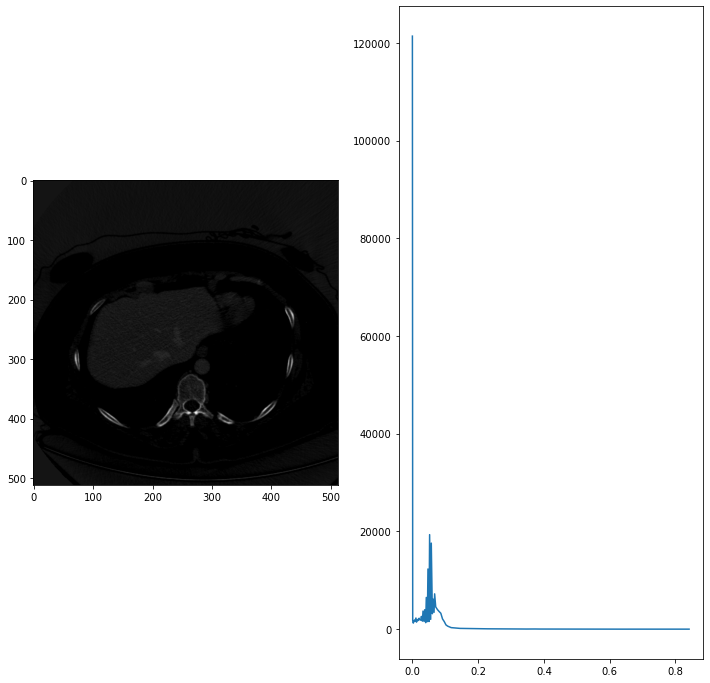

In [50]:
# test = g - np.mean(g);
# test[test<0]=0;
# print('number of values in image: ',len(np.unique(test)));
# plt.figure(figsize=(12,12))
# plt.subplot(1, 2, 1)
# plt.imshow(test, cmap='gray')
# plt.subplot(1, 2, 2)
# uniqtest = np.unique(test, return_counts=True)
# plt.plot(uniqtest[0],uniqtest[1])
# plt.show();

In [61]:
# eig = np.linalg.eig(test)
# np.max(eig[0])

(15.503624379091253+0j)

C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


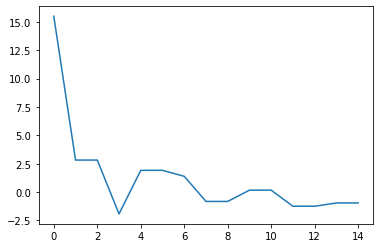

In [63]:

# plt.plot(eig[0][0:15]) # first 10 eigen values

C:\Users\a7mad\anaconda3\envs\3d-reconstruction\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


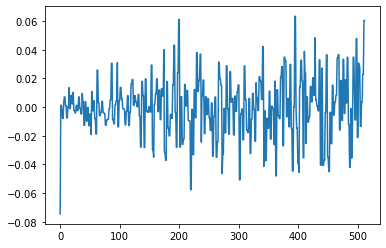

In [69]:
# plt.plot(eig[1][0])

In [65]:
# ?eig